In [311]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

basic_df = pd.read_csv('data-cleaned-v1/basic.csv', index_col=0)
interaction_df = pd.read_csv('data-cleaned-v1/interactions.csv', index_col=0)
attribute_df = pd.read_csv('data-cleaned-v1/attributes.csv', index_col=0)

price = basic_df[['zpid', 'price']].copy()
interactions = interaction_df[['zpid', 'saves', 'views', 'duration']].copy()
type = attribute_df[['zpid', 'type']].copy()

def format_float(item): 
  if isinstance(item, str):
    return float(item.replace(',', ''))
  if not (isinstance(item, float) and isinstance(item, int)):
    return 0
  return item

price['price'] = price['price'].map(format_float)
interactions['views'] = interactions['views'].map(format_float)
interactions['saves'] = interactions['saves'].map(format_float)
price

,zpid,price
0,247509225,399000.0
1,13602165,345000.0
2,13535937,535000.0
3,13097640,499983.0
4,13561330,470000.0
...,...,...
1746,77523070,180000.0
1747,95200143,249900.0
1748,2093557352,260000.0
1749,2083893342,149000.0


In [313]:
def devide_function(a, b):
  if not (isinstance(a, float) and isinstance(b, float) and b != 0):
    return 0
  return a/b

def transform_duration(duration):
  if not isinstance(duration, str):
    return duration
  time_array = duration.split(' ')
  time = float(time_array[0])
  unit = time_array[1]
  if unit == 'hour' or unit == 'hours':
    return time/24
  return time

interaction_price_df = pd.merge(price, interactions, on='zpid').drop(columns=['zpid'])
interaction_price_df['duration'] = interaction_price_df['duration'].map(transform_duration)

interaction_price_df['views_to_duration_ratio'] = interaction_price_df.apply(lambda df: devide_function(df['views'], df['duration']), axis=1)
interaction_price_df['saves_to_duration_ratio'] = interaction_price_df.apply(lambda df: devide_function(df['saves'], df['duration']), axis=1)
interaction_price_df

,price,saves,views,duration,views_to_duration_ratio,saves_to_duration_ratio
0,399000.0,0.0,0.0,0.0,0.000000,0.000000
1,345000.0,105.0,1200.0,4.0,300.000000,26.250000
2,535000.0,27.0,483.0,1.0,483.000000,27.000000
3,499983.0,75.0,1003.0,1.0,1003.000000,75.000000
4,470000.0,123.0,1406.0,1.0,1406.000000,123.000000
...,...,...,...,...,...,...
1746,180000.0,147.0,5083.0,24.0,211.791667,6.125000
1747,249900.0,120.0,2543.0,46.0,55.282609,2.608696
1748,260000.0,74.0,1690.0,8.0,211.250000,9.250000
1749,149000.0,26.0,579.0,1.0,579.000000,26.000000


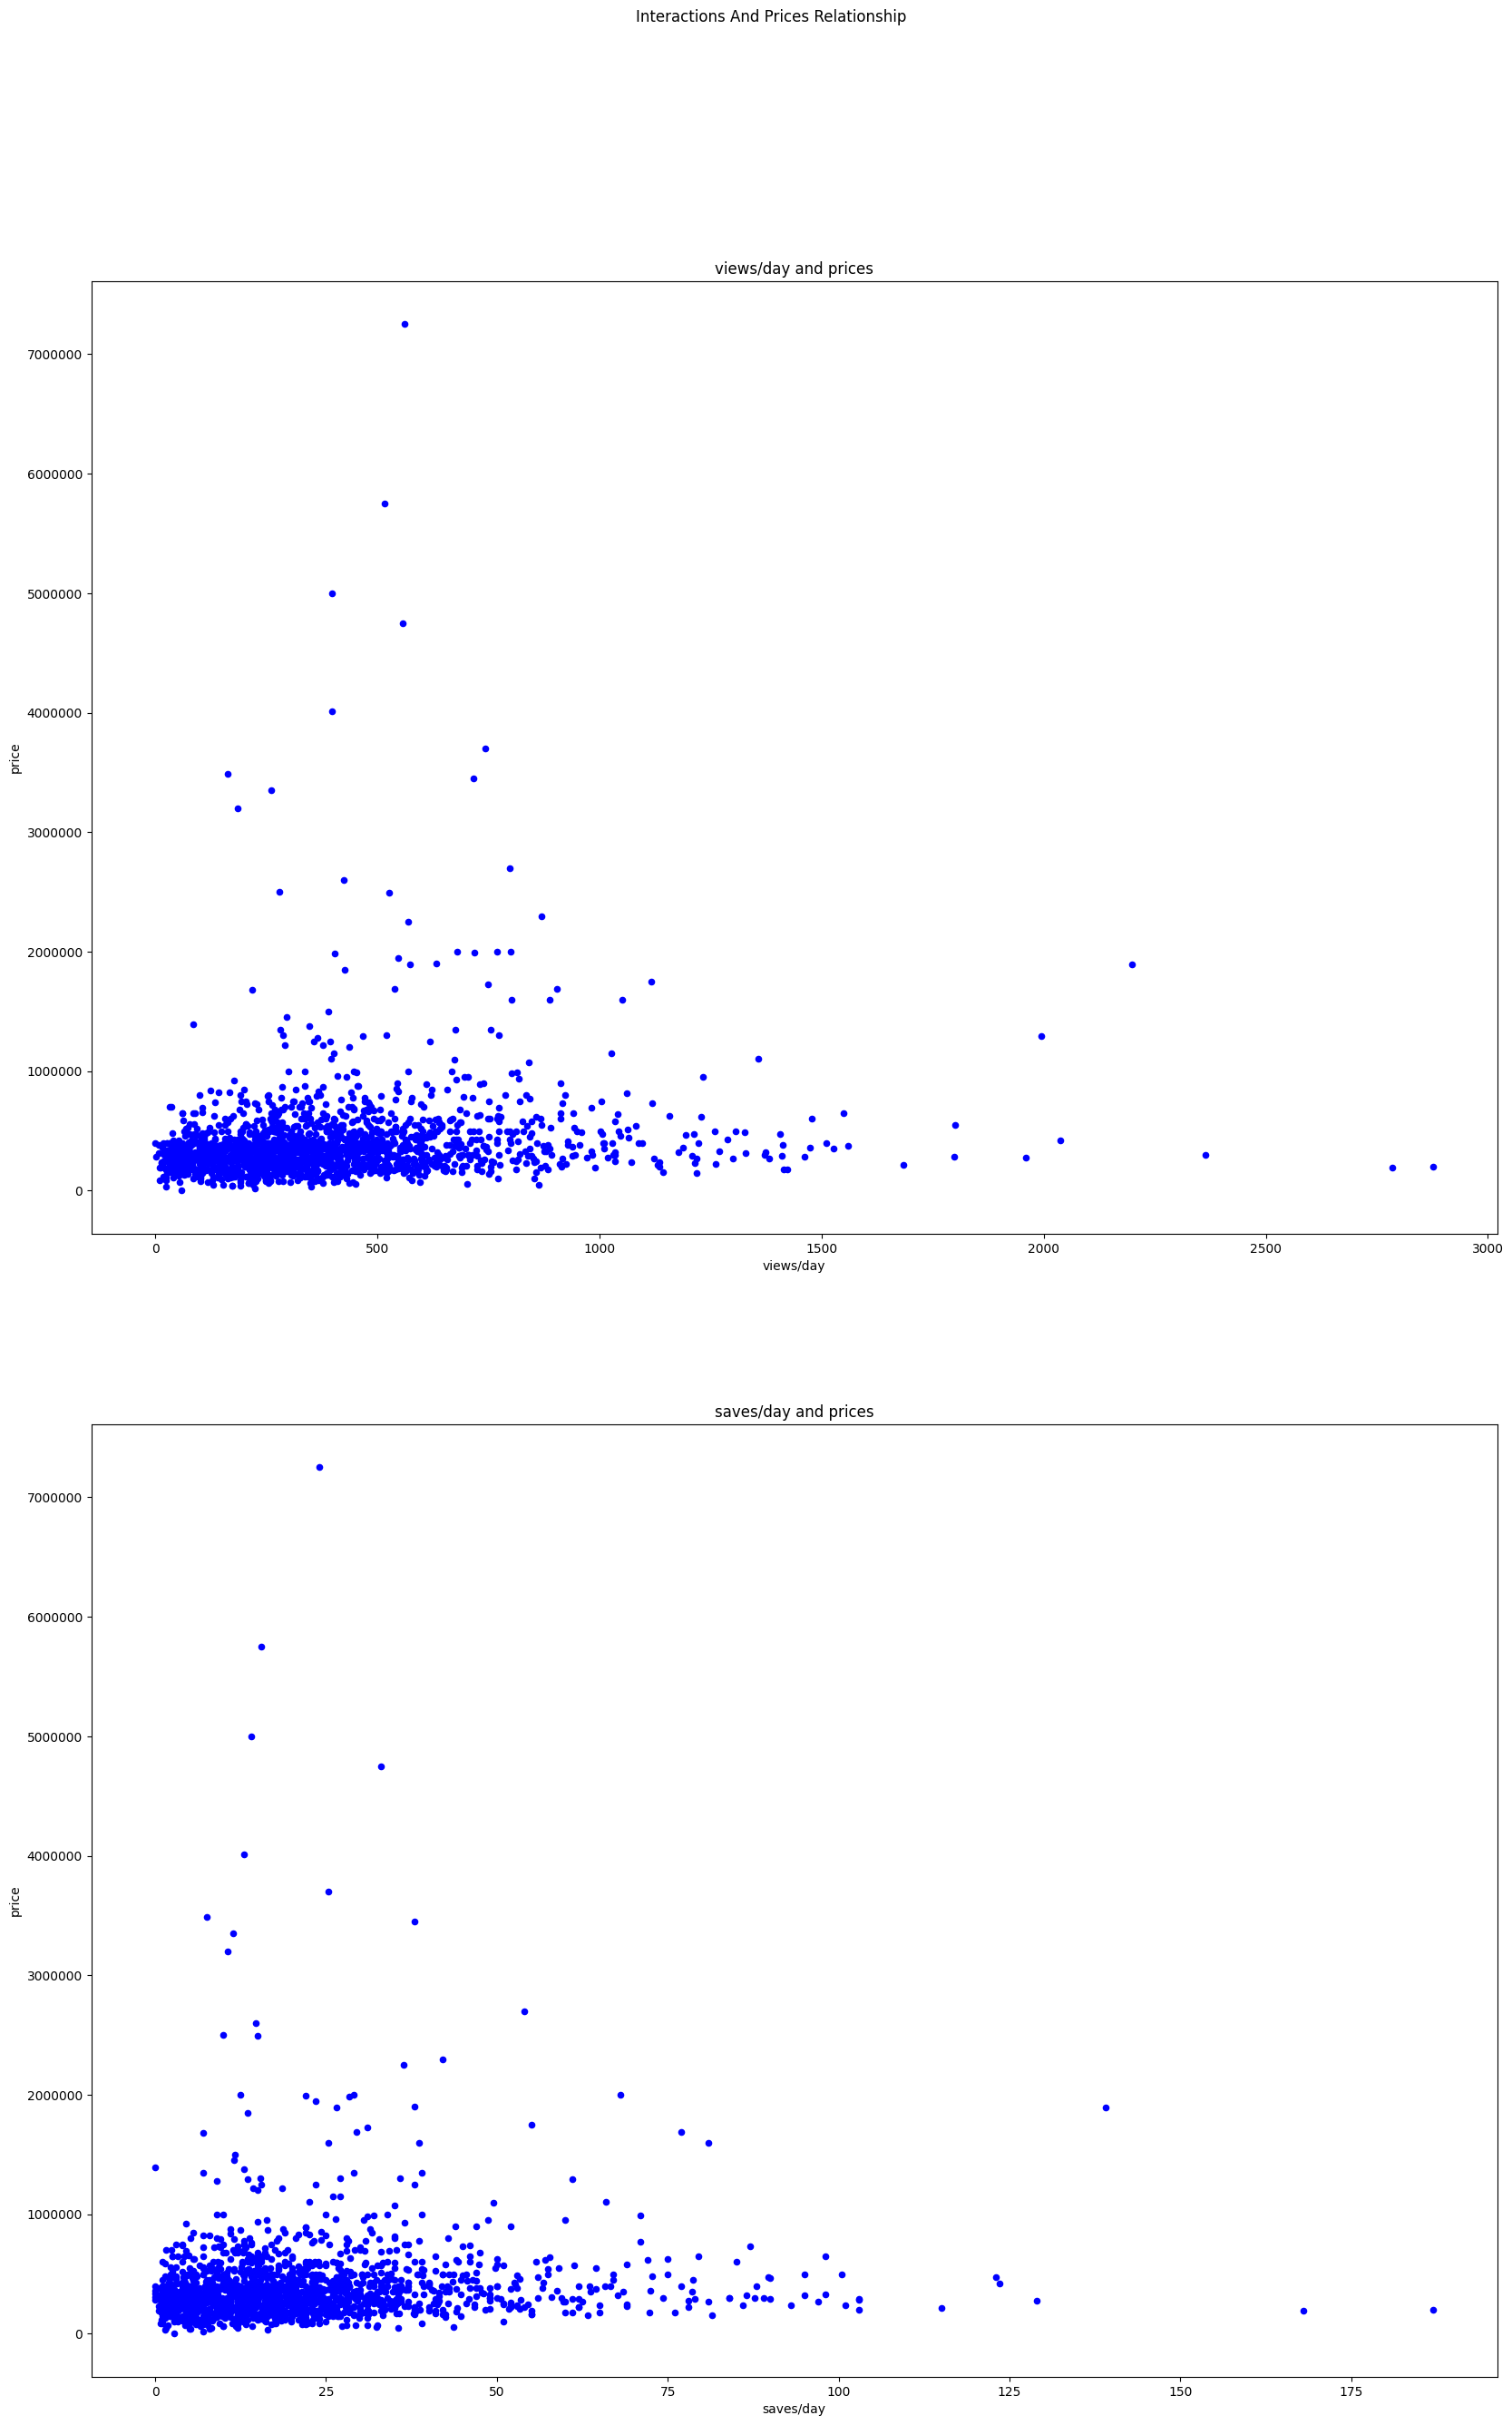

In [314]:
def interaction_price_graph(name, ax):
  ax.scatter(x = interaction_price_df[name + '_to_duration_ratio'].values, y = interaction_price_df['price'].values, c = 'blue', s = 20)
  ax.ticklabel_format(style='plain') 
  ax.set_xlabel(name + '/day')
  ax.set_ylabel('price')  
  ax.set_title(name + '/day and prices')

fig, axs = plt.subplots(2)
fig.suptitle('Interactions And Prices Relationship')
fig.set_figheight(30)
fig.set_figwidth(20)
interaction_price_graph('views', axs[0])
interaction_price_graph('saves', axs[1])
plt.show()

In [315]:
type_price_df = pd.merge(price, type, on='zpid').drop(columns=['zpid'])
type_price_mean_df = type_price_df.groupby('type').mean('price').sort_values('price').reset_index()
type_price_mean_df

,type,price
0,"Adult community, mobile home",4.200000e+04
1,Detached single family,5.990000e+04
2,"Single family residence, manufactured home",9.990000e+04
3,Manufactured on land,1.149500e+05
4,Mobilemanufactured,1.399429e+05
...,...,...
56,Single family - detached,6.500000e+05
57,All other attached,6.750000e+05
58,Res income 2-4 units,7.950000e+05
59,Detached,8.469845e+05


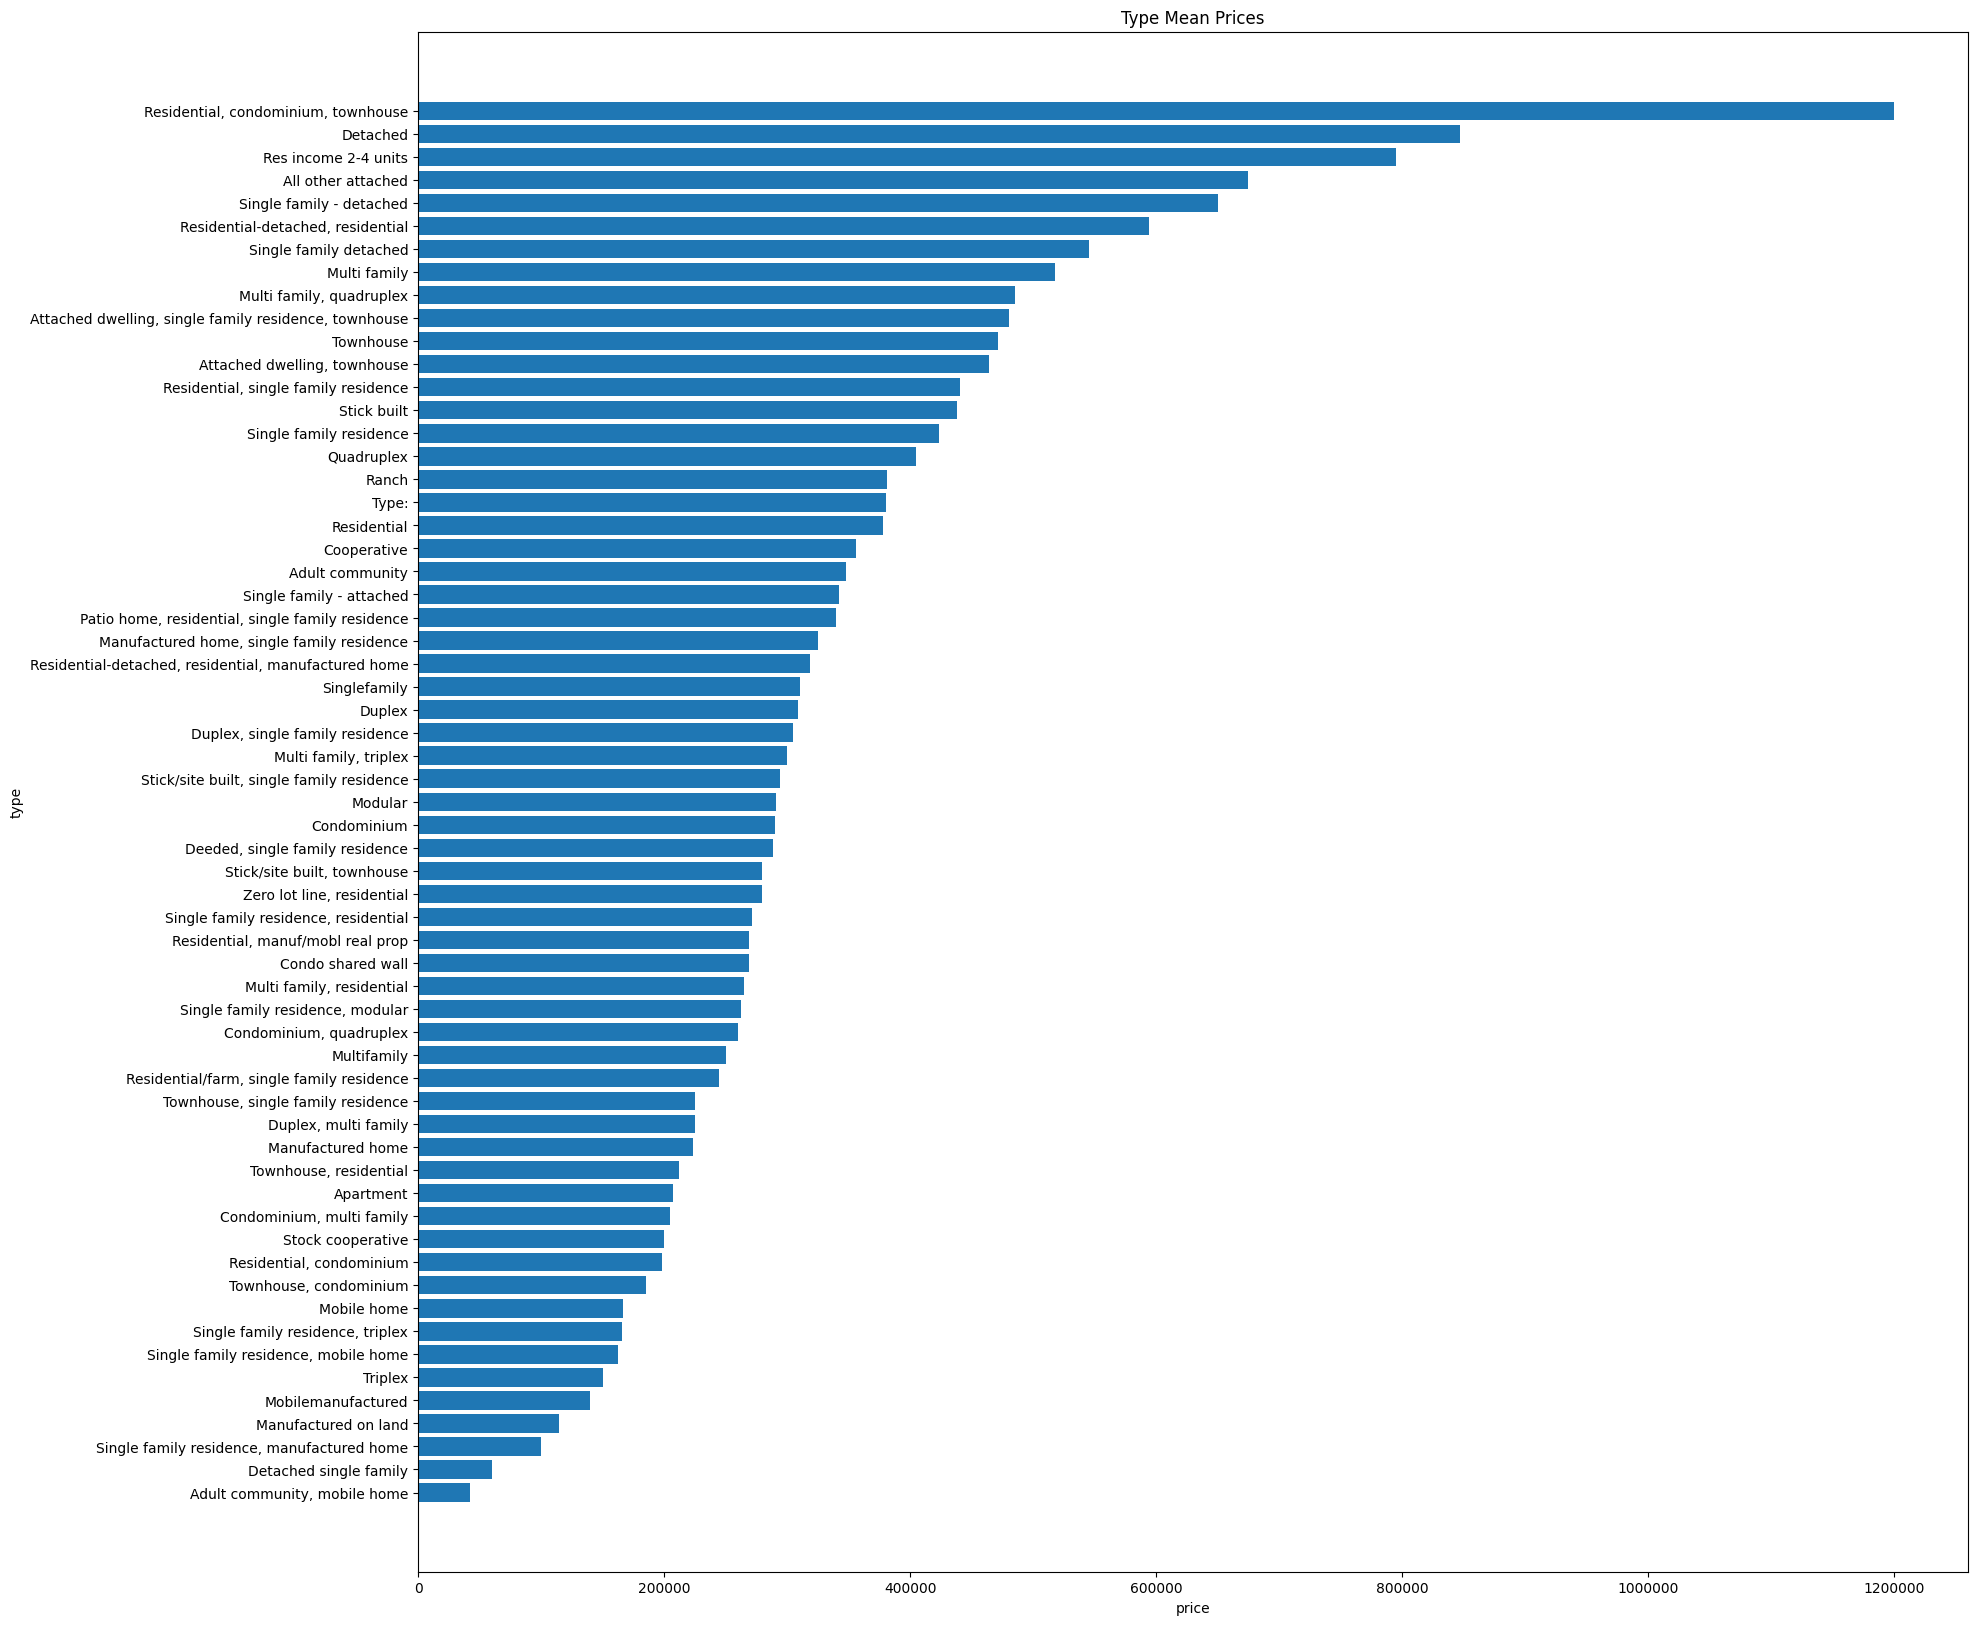

In [308]:
f = plt.figure()
f.set_figheight(20)
f.set_figwidth(20)
plt.barh(type_price_mean_df['type'], type_price_mean_df['price'])
plt.ticklabel_format(axis='x', style='plain') 
plt.xlabel("price")
plt.ylabel("type")  
plt.title("Type Mean Prices")
plt.show()